In [ ]:
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm.simulate.credentials import create_credentials
from pulse_level.qua.qua_utils import clip_qua
from pulse_level.qua.videomode import ParameterTable
from qiskit import pulse
from qiskit.circuit import ParameterVector
from qiskit.pulse.library import SymbolicPulse

SymbolicPulse.disable_validation = True
# Open communication with the server.
qop_ip = None
qmm = QuantumMachinesManager(
    host="tyler-263ed49e.dev.quantum-machines.co",
    port=443,
    credentials=create_credentials(),
)
params = ParameterTable({"param1": 3.7, "param2": 4.5})
param_qiskit = ParameterVector("param", 2)
with program() as measureProg:
    var = params.declare_variables()
    ind = declare(int, value=5)
    print(var)
    clip_qua(params.get_parameter("param1"), 2, 4)
    save(var[0], "var0")
    with pulse.build() as sched:
        pulse.play(
            pulse.Drag(
                amp=param_qiskit[0], sigma=0.1, beta=param_qiskit[1], duration=160
            ),
            pulse.DriveChannel(0),
        )
    sched.assign_parameters({param_qiskit: var})
# Simulate the program on the server
# job = qmm.simulate(
#     config,
#     measureProg,
#     SimulationConfig(
#         4000,  # Duration of simulation in units of clock cycles (4 ns)
#         simulation_interface=LoopbackInterface(
#             [("con1", 1, "con1", 1)]
#         ),  # Simulate a loopback from analog output 1 to analog input 1
#     ),
# )

# Fetch the results of the simulation
# res = job.result_handles
# str = res.get("var").fetch_all()["value"]
# str
print(sched)

In [39]:
from qiskit import pulse
from qiskit.circuit import Parameter

a = Parameter("a")
p = pulse.Drag(amp=a, sigma=0.1, beta=0.5, duration=160)
for key, val in p.parameters.items():
    print(key, val)

In [33]:
cst_p = pulse.Constant(160, 0.5)
cst_p

In [35]:
cst_p.duration

In [7]:
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2
from qiskit.circuit import QuantumCircuit
from qiskit import transpile, schedule

backend = FakeJakartaV2()
backend.target["cx"][(0, 1)].error

0.00891369980626483

In [48]:
backend.target["measure"][(0,)].calibration

In [1]:
from quam.components import *
from quam.examples.superconducting_qubits import Transmon, QuAM

machine = QuAM()  #

num_qubits = 2
for idx in range(num_qubits):
    # Create transmon qubit component
    transmon = Transmon(id=idx)

    # Add xy drive line channel
    transmon.xy = IQChannel(
        opx_output_I=("con1", 3 * idx + 3),
        opx_output_Q=("con1", 3 * idx + 4),
        frequency_converter_up=FrequencyConverter(
            mixer=Mixer(),
            local_oscillator=LocalOscillator(power=10, frequency=6e9),
        ),
        intermediate_frequency=100e6,
    )

    # Add transmon flux line channel
    transmon.z = SingleChannel(opx_output=("con1", 3 * idx + 5))

    # Add resonator channel
    transmon.resonator = InOutIQChannel(
        id=idx,
        opx_output_I=("con1", 3 * idx + 1),
        opx_output_Q=("con1", 3 * idx + 2),
        opx_input_I=("con1", 1),
        opx_input_Q=(
            "con1",
            2,
        ),
        frequency_converter_up=FrequencyConverter(
            mixer=Mixer(), local_oscillator=LocalOscillator(power=10, frequency=6e9)
        ),
    )
    machine.qubits[transmon.name] = transmon

2024-08-07 19:44:06,695 - qm - INFO     - Starting session: 6590b64e-d3e2-4ddd-b323-c0933bafd381


In [8]:
for i in machine.qubits["q0"].iterate_components():
    print(i)

Transmon(id=0, xy=IQChannel(operations={}, id=None, digital_outputs={}, opx_output_I=('con1', 3), opx_output_Q=('con1', 4), opx_output_offset_I=None, opx_output_offset_Q=None, frequency_converter_up=FrequencyConverter(local_oscillator=LocalOscillator(frequency=6000000000.0, power=10), mixer=Mixer(local_oscillator_frequency=6000000000.0, intermediate_frequency=100000000.0, correction_gain=0, correction_phase=0), gain=None), intermediate_frequency=100000000.0, LO_frequency=6000000000.0, RF_frequency=6100000000.0), z=SingleChannel(operations={}, id=None, digital_outputs={}, opx_output=('con1', 5), filter_fir_taps=None, filter_iir_taps=None, opx_output_offset=None, intermediate_frequency=None), resonator=InOutIQChannel(operations={}, id=0, digital_outputs={}, opx_input_I=('con1', 1), opx_input_Q=('con1', 2), time_of_flight=24, smearing=0, opx_input_offset_I=None, opx_input_offset_Q=None, input_gain=None, frequency_converter_down=None, opx_output_I=('con1', 1), opx_output_Q=('con1', 2), opx

In [2]:
from quam.components.pulses import GaussianPulse, DragPulse

# Create a Gaussian pulse
gaussian_pulse = GaussianPulse(length=120, amplitude=0.2, sigma=3)
drag_pulse = DragPulse(
    length=160, amplitude=0.5, sigma=10, anharmonicity=0.5, alpha=0.5, axis_angle=0.2
)
gaussian_pulse.calculate_waveform()
drag_pulse.calculate_waveform()

array([-2.37158993e-07+1.16994204e-06j, -5.15982244e-07+2.54542038e-06j,
       -1.11126208e-06+5.48202812e-06j, -2.36909772e-06+1.16871264e-05j,
       -4.99956590e-06+2.46636339e-05j, -1.04438946e-05+5.15213516e-05j,
       -2.15959076e-05+1.06535962e-04j, -4.42035451e-05+2.18062943e-04j,
       -8.95606346e-05+4.41816501e-04j, -1.79617778e-04+8.86082357e-04j,
       -3.56575208e-04+1.75904081e-03j, -7.00680616e-04+3.45656616e-03j,
       -1.36286724e-03+6.72323549e-03j, -2.62390874e-03+1.29441488e-02j,
       -5.00037689e-03+2.46676349e-02j, -9.43219057e-03+4.65304592e-02j,
       -1.76106362e-02+8.68760003e-02j, -3.25451937e-02+1.60550489e-01j,
       -5.95311864e-02+2.93676578e-01j, -1.07781551e-01+5.31703114e-01j,
       -1.93144662e-01+9.52812583e-01j, -3.42574754e-01+1.68997441e+00j,
       -6.01392672e-01+2.96676336e+00j, -1.04492854e+00+5.15479460e+00j,
       -1.79695017e+00+8.86463401e+00j, -3.05845094e+00+1.50878130e+01j,
       -5.15202329e+00+2.54157303e+01j, -8.58933248

In [17]:
list(machine.qubits.values())

In [4]:
machine.generate_config()

In [5]:
quam = QuAM.load("quam_state.json")
quam

In [25]:
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.primitives import BackendEstimatorV2, BackendEstimator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.quantum_info import SparsePauliOp

param = Parameter("param")
param_vec = ParameterVector("param", 2)
qc = QuantumCircuit(2)
qc.rx(param, 0)
qc.ry(param_vec[0], 0)
qc.rz(param_vec[1], 0)

obs = SparsePauliOp.from_list([("XX", 3.0), ("YY", 2.0)])
backend = GenericBackendV2(2)
estimator = BackendEstimatorV2(backend=backend)
estimatorv1 = BackendEstimator(backend=backend)
job = estimator.run(
    [(qc, obs, {param: [0.5, 0.3], param_vec: [[0.3, 0.7], [0.2, 0.4]]})]
)
jobv1 = estimatorv1.run([qc], observables=[obs], parameter_values=[0.5, 0.3, 0.2])
result = job.result()
resultv1 = jobv1.result()

In [54]:
result[0].data.evs

In [46]:
qc.parameters

In [37]:
estimatorv1.preprocessed_circuits[0][1][1].draw("mpl")

In [41]:
from qiskit.transpiler import Layout
from qiskit import QuantumRegister

qr = QuantumRegister(2)
layout = Layout({qr[0]: 2, qr[1]: 1})
layout.get_physical_bits()

# OpenQASM3 to QUA compiler

In [5]:
from qiskit.circuit import Gate


class MyGate(Gate):
    def __init__(self, theta):
        super().__init__("my_gate", 1, [theta])

    def _define(self):
        from qiskit.circuit import QuantumCircuit

        qc = QuantumCircuit(1)
        qc.rx(self.params[0], 0)
        self._definition = qc

    def inverse(self, annotated=False):
        return MyGate(-self.params[0])

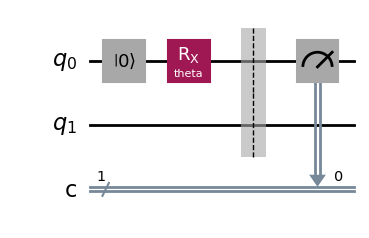

In [6]:
from qiskit.qasm3 import dumps
from qiskit import transpile
from qiskit.circuit import Parameter, QuantumCircuit, Gate
from qiskit import pulse
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2
import numpy as np

qc = QuantumCircuit(2, 1)
param = Parameter("theta")
my_gate = MyGate(param)
qc.reset(0)
qc.rx(param, 0)
qc.barrier()
# qc.append(my_gate, [0])
qc.measure(0, 0)

with pulse.build() as sched:
    pulse.play(
        pulse.Drag(amp=param, sigma=0.1, beta=0.5, duration=160), pulse.DriveChannel(0)
    )
qc.add_calibration(my_gate, [0], sched)

# backend = FakeJakartaV2()
# qc = transpile(qc, backend, scheduling_method="asap")
qc.draw("mpl")

In [7]:
ch_param = Parameter("ch")
amp_param = Parameter("amp")
with pulse.build() as sched:
    pulse.play(
        pulse.Drag(amp=amp_param, sigma=0.1, beta=0.5, duration=160),
        pulse.DriveChannel(ch_param),
    )
sched.channels

(DriveChannel(ch),)

In [8]:
string = ""
for custom_gate, cal_info in qc.calibrations.items():
    for (qubits, parameters), schedule in cal_info.items():
        print(qubits)
        print(parameters)
        print(schedule)
        string += f"{custom_gate}{tuple(param.name for param in parameters)};\n"

string

(0,)
(Parameter(theta),)
ScheduleBlock(Play(Drag(duration=160, sigma=0.1, beta=0.5, amp=theta, angle=0.0), DriveChannel(0)), name="block0", transform=AlignLeft())


"my_gate('theta',);\n"

In [9]:
print(qc.calibrations)

{'my_gate': {((0,), (Parameter(theta),)): ScheduleBlock(Play(Drag(duration=160, sigma=0.1, beta=0.5, amp=theta, angle=0.0), DriveChannel(0)), name="block0", transform=AlignLeft())}}


In [10]:
openqasm = dumps(qc, includes=(), basis_gates=("rx",))
print(openqasm)

OPENQASM 3.0;
input float[64] theta;
bit[1] c;
qubit[2] q;
reset q[0];
rx(theta) q[0];
barrier q[0], q[1];
c[0] = measure q[0];



In [29]:
from oqc import Compiler, HardwareConfig, OperationIdentifier, OperationsMapping
from qm.qua import play, amp, measure as qua_meas, fixed, declare


def play_rx(theta):
    play("rx" * amp(theta), "qubit")


def measure():
    i = declare(fixed)
    qua_meas("meas", "qubit", None, ("integW1", "out1", i))
    return i < 0.02


def barrier(*args):
    align(*args)


def play_x():
    play("x", "qubit")


operations: OperationsMapping = {
    OperationIdentifier("rx", 1, (0,)): play_rx,
    OperationIdentifier("x", 0, (0,)): play_x,
    OperationIdentifier("measure", 0, (0,)): measure,
    OperationIdentifier("barrier", 0, (0,)): barrier,
}
# "x $0;": play_x,
# "rx(theta) $0;": play_rx,
# "measure $0;": measure,
# }
qubits_mapping = {0: ("qubit",)}
hardware_config = HardwareConfig(operations, qubits_mapping)
compiler = Compiler(hardware_config)

UnexpectedVarPositionalArgument: Operation 'barrier' should not have a varying number of qubit inputs,but the given qua-function (barrier) have an *args in its signature.

In [18]:
comp = compiler.compile(openqasm)

In [19]:
qua_prog = comp.result_program.dsl_program

In [20]:
from qm import generate_qua_script

qua_script = generate_qua_script(qua_prog)
qua_script

'\n# Single QUA script generated at 2024-07-05 15:02:56.731260\n# QUA library version: 1.1.7\n\nfrom qm.qua import *\n\nwith program() as prog:\n    input_stream_theta = declare_input_stream(fixed, \'theta\', value=0.0)\n    a1 = declare(bool, value=[0.0])\n    v1 = declare(fixed, )\n    advance_input_stream(input_stream_theta)\n    play("rx"*amp(input_stream_theta), "qubit")\n    measure("meas", "qubit", None, demod.full("integW1", v1, "out1"))\n    assign(a1[0], (v1<0.02))\n\n\nconfig = None\n\nloaded_config = None\n\n'

# Qua-QSIM: from QUA macro to Qiskit Pulse Schedule

In [12]:
from quaqsim import Compiler
from qm.qua import play, amp, measure as qua_meas, fixed, declare, program
from quam.components import *
from quam.components.pulses import GaussianPulse
from quam.examples.superconducting_qubits import Transmon, QuAM

machine = QuAM()  #

num_qubits = 2
for idx in range(num_qubits):
    # Create transmon qubit component
    transmon = Transmon(id=idx)

# Add xy drive line channel
transmon.xy = IQChannel(
    opx_output_I=("con1", 3 * idx + 3),
    opx_output_Q=("con1", 3 * idx + 4),
    frequency_converter_up=FrequencyConverter(
        mixer=Mixer(),
        local_oscillator=LocalOscillator(power=10, frequency=6e9),
    ),
    intermediate_frequency=100e6,
)

# Add transmon flux line channel
transmon.z = SingleChannel(opx_output=("con1", 3 * idx + 5))

# Add resonator channel
transmon.resonator = InOutIQChannel(
    id=idx,
    opx_output_I=("con1", 3 * idx + 1),
    opx_output_Q=("con1", 3 * idx + 2),
    opx_input_I=("con1", 1),
    opx_input_Q=(
        "con1",
        2,
    ),
    frequency_converter_up=FrequencyConverter(
        mixer=Mixer(), local_oscillator=LocalOscillator(power=10, frequency=6e9)
    ),
)
machine.qubits[transmon.name] = transmon
transmon.xy.operations["x"] = GaussianPulse(length=20, amplitude=0.2, sigma=3)


def play_x():
    play("x", "qubit")


config = machine.generate_config()
compiler = Compiler(config)

In [13]:
from quaqsim.architectures.from_qua_channels import BackendChannel, ChannelType

with program() as qua_prog:
    play_x()
compiler.compile(
    qua_prog,
    channel_map={
        0: BackendChannel(0, ChannelType.DRIVE),
        1: BackendChannel(1, ChannelType.DRIVE),
    },
)

TypeError: Compiler.compile() missing 1 required positional argument: 'backend'

In [52]:
from qiskit import pulse
from qiskit.pulse.transforms import block_to_schedule
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2
from qiskit.circuit import Parameter

backend = FakeJakartaV2()
param_channel = Parameter("channel")
param_amp = Parameter("amp")
param_sig = Parameter("sigma")
param_wait = Parameter("wait")
with pulse.build(backend, default_alignment="right") as sched:
    pulse.play(
        pulse.Drag(amp=param_amp, sigma=param_sig, beta=0.5, duration=160),
        pulse.DriveChannel(param_channel),
    )
    pulse.delay(10, pulse.DriveChannel(0))
    pulse.play(
        pulse.Drag(amp=0.5, sigma=20, beta=0.5, duration=160), pulse.DriveChannel(1)
    )

type(sched.instructions[1][1].pulse.parameters["amp"])

qiskit.circuit.parameter.Parameter

In [25]:
sched: pulse.Schedule = backend.target["cx"][(1, 3)].calibration

In [41]:
param = Parameter("theta")
play_inst = pulse.Play(
    pulse.Drag(amp=param, sigma=0.1, beta=0.5, duration=160), pulse.DriveChannel(0)
)

Play(Drag(duration=160, sigma=0.1, beta=0.5, amp=theta, angle=0.0), DriveChannel(0))

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2

qc = QuantumCircuit(2)
backend = FakeJakartaV2()


def qua_x():
    play_x()


qc.x(0)
qc.add_calibration("x", [0], qua_x)
qc = transpile(qc, backend, scheduling_method="asap")

AttributeError: 'function' object has no attribute 'duration'

In [10]:
from qiskit.circuit import Parameter
import numpy as np

param = Parameter("theta")

a = 2 * param.sin()
a.sympify().func

symengine.lib.symengine_wrapper.Mul

In [3]:
from qua_backend import QuAMQiskitPulse
from qiskit import pulse as qiskit_pulse

qq_pulse = qiskit_pulse.Drag(amp=0.5, sigma=20, beta=0.5, duration=120, name="drag")
qua_pulse = QuAMQiskitPulse(pulse=qq_pulse)
qq_pulse.get_waveform().samples

2024-07-08 12:33:16,424 - qm - INFO     - Starting session: ab544971-239a-44f8-9834-b69278f91250


array([0.00122208+9.08919537e-05j, 0.0021825 +1.59595420e-04j,
       0.0032753 +2.35412473e-04j, 0.00451526+3.18890054e-04j,
       0.00591823+4.10577357e-04j, 0.00750119+5.11018815e-04j,
       0.00928218+6.20746090e-04j, 0.01128029+7.40269090e-04j,
       0.01351559+8.70066011e-04j, 0.01600907+1.01057248e-03j,
       0.01878254+1.16216982e-03j, 0.02185852+1.32517266e-03j,
       0.02526006+1.49981580e-03j, 0.02901059+1.68624077e-03j,
       0.03313375+1.88448205e-03j, 0.03765309+2.09445325e-03j,
       0.04259188+2.31593359e-03j, 0.0479728 +2.54855477e-03j,
       0.05381761+2.79178874e-03j, 0.06014689+3.04493649e-03j,
       0.06697961+3.30711837e-03j, 0.0743328 +3.57726615e-03j,
       0.08222117+3.85411721e-03j, 0.09065668+4.13621121e-03j,
       0.09964821+4.42188950e-03j, 0.1092011 +4.70929758e-03j,
       0.1193168 +4.99639092e-03j, 0.12999247+5.28094419e-03j,
       0.14122068+5.56056428e-03j, 0.15298903+5.83270692e-03j,
       0.16527992+6.09469720e-03j, 0.17807028+6.3437537

In [17]:
from qiskit.circuit import Parameter
import numpy as np

a = Parameter("a")
b = 2 * np.sin(a)
b.sympify()

2*sin(a)